## Coding project

In [1]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('dslabs')

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [2]:
library(dslabs)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# making a variable of each table for denmark
D052020 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2020-W05.csv")
D222020 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2020-W22.csv")
D402020 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2020-W40.csv")
D042021 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2021-W04.csv")
D212021 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2021-W21.csv")
D392021 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2021-W39.csv")
D042022 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2022-W04.csv")
D212022 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2022-W21.csv")
D392022 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2022-W39.csv")
D042023 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2023-W04.csv")
D222023 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2023-W22.csv")
D392023 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2023-W39.csv")
D052024 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2024-W05.csv")
D222024 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2024-W22.csv")
D392024 <- read.csv("/work/CulturalDataScience/DanmarkData/Danmark Top Songs - 2024-W39.csv")

In [4]:
# adding column with weekname and year
D052020 <- data.frame(append(D052020, c(Week='052020', Year='2020'), after=1))
D222020 <- data.frame(append(D222020, c(Week='222020', Year='2020'), after=1))
D402020 <- data.frame(append(D402020, c(Week='402020', Year='2020'), after=1))
D042021 <- data.frame(append(D042021, c(Week='042021', Year='2021'), after=1))
D212021 <- data.frame(append(D212021, c(Week='212021', Year='2021'), after=1))
D392021 <- data.frame(append(D392021, c(Week='392021', Year='2021'), after=1))
D042022 <- data.frame(append(D042022, c(Week='042022', Year='2022'), after=1))
D212022 <- data.frame(append(D212022, c(Week='212022', Year='2022'), after=1))
D392022 <- data.frame(append(D392022, c(Week='392022', Year='2022'), after=1))
D042023 <- data.frame(append(D042023, c(Week='042023', Year='2023'), after=1))
D222023 <- data.frame(append(D222023, c(Week='222023', Year='2023'), after=1))
D392023 <- data.frame(append(D392023, c(Week='392023', Year='2023'), after=1))
D052024 <- data.frame(append(D052024, c(Week='052024', Year='2024'), after=1))
D222024 <- data.frame(append(D222024, c(Week='222024', Year='2024'), after=1))
D392024 <- data.frame(append(D392024, c(Week='392024', Year='2024'), after=1))

In [5]:
#Bind all the dataframes into one dataframe
Danmark <- rbind(D052020, D222020, D402020, D042021,D212021,D392021,D042022,D212022,D392022,D042023,D222023,D392023,D052024,D222024,D392024)

In [6]:
#Checking column names
str(Danmark)

'data.frame':	1501 obs. of  14 variables:
 $ Position                        : chr  "1" "2" "3" "4" ...
 $ Week                            : chr  "052020" "052020" "052020" "052020" ...
 $ Year                            : chr  "2020" "2020" "2020" "2020" ...
 $ Up.or.Down                      : chr  "up" "up" "up" "up" ...
 $ Artist                          : chr  "The Weeknd" "Billie Eilish" "Tones and I" "Roddy Ricch" ...
 $ Song                            : chr  "Blinding Lights" "everything i wanted" "Dance Monkey" "The Box" ...
 $ Last.Week                       : chr  "1" "7" "3" "4" ...
 $ Peak.Position                   : int  1 2 1 4 2 3 2 1 2 8 ...
 $ Weeks.on.Chart                  : int  10 12 13 5 3 13 13 4 5 7 ...
 $ Global.Chart.Debut              : int  94 53 6 91 84 5 19 86 86 NA ...
 $ Week.GC                         : chr  "2019-12-01" "2019-11-17" "2019-10-06" "2019-12-08" ...
 $ Highest.Position.in.Global.Chart: int  1 3 1 2 12 5 3 6 3 NA ...
 $ Week.HP           

In [7]:
#Removing unwanted columns
Danmark2 = select(Danmark, -Up.or.Down:-Week.HP)
head(Danmark2)

,Position,Week,Year,Gender
,<chr>,<chr>,<chr>,<int>
1,1,052020,2020,2
2,2,052020,2020,1
3,3,052020,2020,1
4,4,052020,2020,2
5,5,052020,2020,2
6,6,052020,2020,1


In [8]:
#converting Gender from integer to factor
Danmark2[,'Gender'] <- as.factor(as.integer(Danmark2[,'Gender']))

In [9]:
#Checking
head(Danmark2)

,Position,Week,Year,Gender
,<chr>,<chr>,<chr>,<fct>
1,1,052020,2020,2
2,2,052020,2020,1
3,3,052020,2020,1
4,4,052020,2020,2
5,5,052020,2020,2
6,6,052020,2020,1


In [10]:
Danmark2[,'Year'] <- as.integer(as.character(Danmark2[,'Year']))
Danmark2[,'Week'] <- as.integer(as.character(Danmark2[,'Week']))

In [11]:
head(Danmark2)

,Position,Week,Year,Gender
,<chr>,<int>,<int>,<fct>
1,1,52020,2020,2
2,2,52020,2020,1
3,3,52020,2020,1
4,4,52020,2020,2
5,5,52020,2020,2
6,6,52020,2020,1


In [12]:
# summarised female representation for each week
just_womenD <- Danmark2 %>%
    filter(Gender == 1) %>%
    group_by(Week, Year) %>%
    summarise(count = n())

`summarise()` has grouped output by 'Week'. You can override using the
`.groups` argument.


In [13]:
#show
just_womenD

Week,Year,count
<int>,<int>,<int>
42021,2021,29
42022,2022,23
42023,2023,15
52020,2020,24
52024,2024,22
212021,2021,28
212022,2022,14
222020,2020,28
222023,2023,17


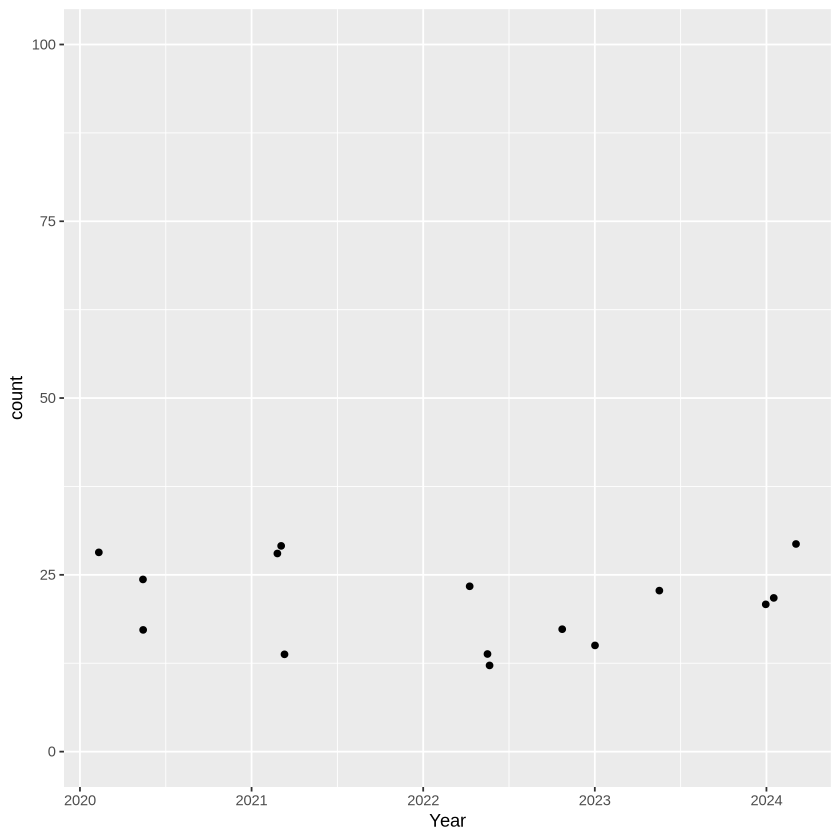

In [14]:
#plotting the data
ggplot(just_womenD,
       aes(x = Year,
           y = count)) +
    geom_point(position = 'jitter') +
    ylim(0,100)

`summarise()` has grouped output by 'Week'. You can override using the
`.groups` argument.


In [76]:
just_mixedD

Week,Year,count
<int>,<int>,<int>
42021,2021,9
42022,2022,12
42023,2023,9
52020,2020,9
52024,2024,11
212021,2021,10
212022,2022,9
222020,2020,13
222023,2023,12


In [16]:
# making a linear model 
linearwomen <- lm(count~Year, just_womenD)
summary(linearwomen)


Call:
lm(formula = count ~ Year, data = just_womenD)

Residuals:
   Min     1Q Median     3Q    Max 
-9.067 -5.233  1.600  4.267  8.600 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  695.0667  2260.8971   0.307    0.763
Year          -0.3333     1.1181  -0.298    0.770

Residual standard error: 6.124 on 13 degrees of freedom
Multiple R-squared:  0.00679,	Adjusted R-squared:  -0.06961 
F-statistic: 0.08887 on 1 and 13 DF,  p-value: 0.7703


In [17]:
#Add country column to compare with Norway
women_denmark <- data.frame(append(just_womenD, c(Country = 'Denmark'), after=3))
women_denmark

Week,Year,count,Country
<int>,<int>,<int>,<chr>
42021,2021,29,Denmark
42022,2022,23,Denmark
42023,2023,15,Denmark
52020,2020,24,Denmark
52024,2024,22,Denmark
212021,2021,28,Denmark
212022,2022,14,Denmark
222020,2020,28,Denmark
222023,2023,17,Denmark


In [18]:
# making a variable of each table for norway
N052020 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2020-W05.csv")
N222020 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2020-W22.csv")
N402020 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2020-W40.csv")
N042021 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2021-W04.csv")
N212021 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2021-W21.csv")
N392021 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2021-W39.csv")
N042022 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2022-W04.csv")
N212022 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2022-W21.csv")
N392022 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2022-W39.csv")
N042023 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2023-W04.csv")
N222023 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2023-W22.csv")
N392023 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2023-W39.csv")
N052024 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2024-W05.csv")
N222024 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2024-W22.csv")
N392024 <- read.csv("/work/CulturalDataScience/Norge Data/Norge Top Songs - 2024-W39.csv")

In [19]:
# adding column with weekname and year
N052020 <- data.frame(append(N052020, c(Week='052020', Year='2020'), after=1))
N222020 <- data.frame(append(N222020, c(Week='222020', Year='2020'), after=1))
N402020 <- data.frame(append(N402020, c(Week='402020', Year='2020'), after=1))
N042021 <- data.frame(append(N042021, c(Week='042021', Year='2021'), after=1))
N212021 <- data.frame(append(N212021, c(Week='212021', Year='2021'), after=1))
N392021 <- data.frame(append(N392021, c(Week='392021', Year='2021'), after=1))
N042022 <- data.frame(append(N042022, c(Week='042022', Year='2022'), after=1))
N212022 <- data.frame(append(N212022, c(Week='212022', Year='2022'), after=1))
N392022 <- data.frame(append(N392022, c(Week='392022', Year='2022'), after=1))
N042023 <- data.frame(append(N042023, c(Week='042023', Year='2023'), after=1))
N222023 <- data.frame(append(N222023, c(Week='222023', Year='2023'), after=1))
N392023 <- data.frame(append(N392023, c(Week='392023', Year='2023'), after=1))
N052024 <- data.frame(append(N052024, c(Week='052024', Year='2024'), after=1))
N222024 <- data.frame(append(N222024, c(Week='222024', Year='2024'), after=1))
N392024 <- data.frame(append(N392024, c(Week='392024', Year='2024'), after=1))

In [20]:
#Binding dataframes together

Norge <- rbind(N052020, N222020, N402020, N042021,N212021,N392021,N042022,N212022,N392022,N042023,N222023,N392023,N052024,N222024,N392024)

In [21]:
#Checking
str(Norge)

'data.frame':	1501 obs. of  14 variables:
 $ Position                        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Week                            : chr  "052020" "052020" "052020" "052020" ...
 $ Year                            : chr  "2020" "2020" "2020" "2020" ...
 $ Up.or.Down                      : chr  "up" "up" "up" "up" ...
 $ Artist                          : chr  "The Weeknd" "Herman Flesvig" "Eminem" "Billie Eilish" ...
 $ Song                            : chr  "Blinding Lights" "Haugenstua" "Godzilla (feat. Juice WRLD)" "everything i wanted" ...
 $ Last.Week                       : chr  "1" "2" "3" "6" ...
 $ Peak.Position                   : chr  "1" "1" "3" "1" ...
 $ Weeks.on.Chart                  : int  10 3 3 12 13 8 13 13 13 4 ...
 $ Global.Chart.Debut              : int  94 NA 84 53 6 91 19 5 4 86 ...
 $ Week.GC                         : chr  "2019-12-01" "" "2020-01-19" "2019-11-17" ...
 $ Highest.Position.in.Global.Chart: int  1 NA 12 3 1 2 3 5 4 6 ...
 $ Week.HP    

In [22]:
#Removing unwanted columns
Norge2 = select(Norge, -Up.or.Down:-Week.HP)
head(Norge2)

,Position,Week,Year,Gender
,<int>,<chr>,<chr>,<int>
1,1,052020,2020,2
2,2,052020,2020,2
3,3,052020,2020,2
4,4,052020,2020,1
5,5,052020,2020,1
6,6,052020,2020,2


In [23]:
#converting Gender from integer to factor
Norge2[,'Gender'] <- as.factor(as.integer(Norge2[,'Gender']))

In [24]:
#checking
head(Norge2)

,Position,Week,Year,Gender
,<int>,<chr>,<chr>,<fct>
1,1,052020,2020,2
2,2,052020,2020,2
3,3,052020,2020,2
4,4,052020,2020,1
5,5,052020,2020,1
6,6,052020,2020,2


In [25]:
just_womenN <- Norge2 %>%
    filter(Gender == 1) %>%
    group_by(Week, Year) %>%
    summarise(count = n())

`summarise()` has grouped output by 'Week'. You can override using the
`.groups` argument.


In [26]:
#show
just_womenN

Week,Year,count
<chr>,<chr>,<int>
042021,2021,33
042022,2022,29
042023,2023,19
052020,2020,28
052024,2024,22
212021,2021,34
212022,2022,16
222020,2020,37
222023,2023,28


In [27]:
#Add country column to compare with Denmark
women_norway <- data.frame(append(just_womenN, c(Country = 'Norway'), after=3))
women_norway

Week,Year,count,Country
<chr>,<chr>,<int>,<chr>
042021,2021,33,Norway
042022,2022,29,Norway
042023,2023,19,Norway
052020,2020,28,Norway
052024,2024,22,Norway
212021,2021,34,Norway
212022,2022,16,Norway
222020,2020,37,Norway
222023,2023,28,Norway


In [28]:
DenmarkNorway <- rbind(women_denmark,women_norway)
DenmarkNorway

Week,Year,count,Country
<chr>,<chr>,<int>,<chr>
42021,2021,29,Denmark
42022,2022,23,Denmark
42023,2023,15,Denmark
52020,2020,24,Denmark
52024,2024,22,Denmark
212021,2021,28,Denmark
212022,2022,14,Denmark
222020,2020,28,Denmark
222023,2023,17,Denmark


In [72]:
DenmarkNorway[,'Country'] <- as.factor(as.character(DenmarkNorway[,'Country']))

In [30]:
DenmarkNorway[,'Week'] <- as.integer(as.character(DenmarkNorway[,'Week']))

In [54]:
DenmarkNorway[,'Year'] <- as.integer(as.character(DenmarkNorway[,'Year']))

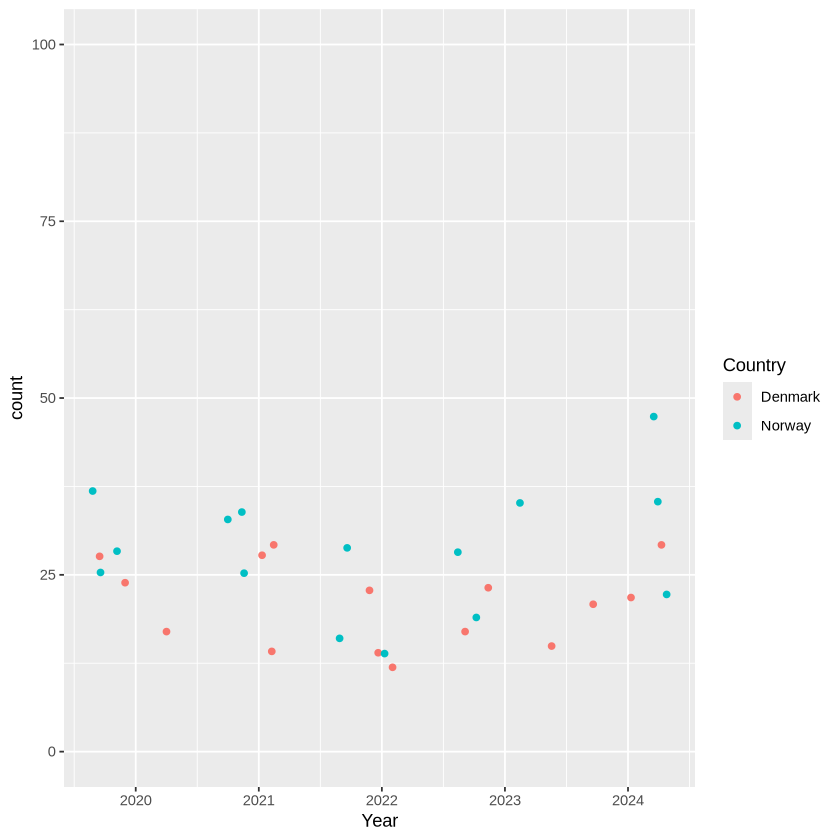

In [32]:
#plotting the data
ggplot(DenmarkNorway,
       aes(x = Year,
           y = count,
    color = Country)) + 
    geom_point(position = 'jitter') +
    ylim(0,100)

`geom_smooth()` using formula = 'y ~ x'


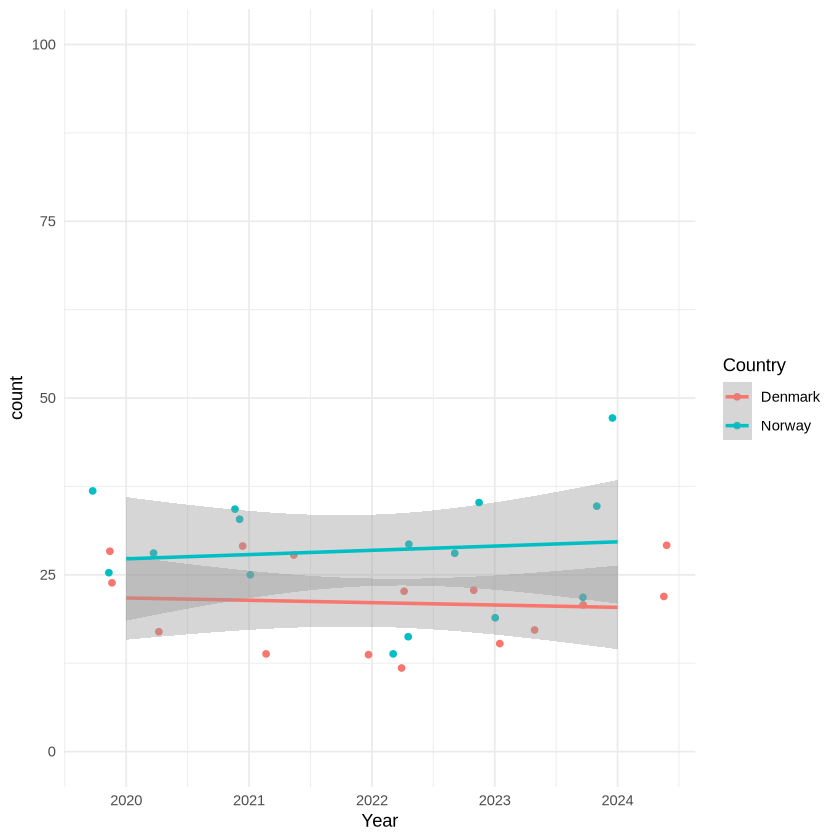

In [63]:
#Adding linear regression
#plotting the data
ggplot(DenmarkNorway,
       aes(x = Year,
           y = count,
    color = Country)) + 
    geom_point(position = 'jitter') +
    geom_smooth(method='lm') +
    ylim(0,100)+
theme_minimal()

In [73]:
comparewomen <- lm(count~Country, DenmarkNorway)
summary(comparewomen)


Call:
lm(formula = count ~ Country, data = DenmarkNorway)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4667  -5.5667   0.2333   6.2833  18.5333 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      21.07       1.93  10.915 1.35e-11 ***
CountryNorway     7.40       2.73   2.711   0.0113 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.475 on 28 degrees of freedom
Multiple R-squared:  0.2079,	Adjusted R-squared:  0.1796 
F-statistic:  7.35 on 1 and 28 DF,  p-value: 0.01133
